#Overview

This Juptyer notebook details the data analysis conducted on World Happiness Reports from 2015 - 2019. The primary purpose of this notebook is to report on how data was cleaned and prepared for analysis.

Analysis consisted of several multiple regressions to identify which variables within World Happiness Reports are accounting for variations in happiness scores both overall and by region.

#Loading Data


Our data ended up being relatively clean. The biggest obstacle was identifying the common columns across all the datasets and identifying if any countries had missing data and if they should be excluded from analysis.

The common columns across all years reports were:
* Happiness Rank
* Country
* Happiness Score
* GDP per capita
* Social Support
* Health (in terms of life expectancy)
* Freedom (in terms of making life choices)
* Generosity
* Trust (perceptions of government corruption)

I added the "year" column in order to differentiate between reports.

In terms of excluding countries, there were 8 countries that weren't included in analysis because they were missing several years worth of data. These included:
* Djibouti (only included 2015)
* Gambia (only included 2019)
* North Macedonia (only included 2019)
* Oman (only included 2015)
* Puerto Rico (only included 2016)
* Somaliland Region (only 2015 - 2016)
* Suriname (only 2015 - 2016)
* Swailand (only 2015 & 2019)

A `region` column has also been added as a way to aggregate the ~150 countries

In [ ]:
#Used the 'googledrive' package because R was not liking my csv file when I used the "read.csv" function
install.packages("googledrive")

library(googledrive)
drive_auth()

world_happiness_report <- drive_find(pattern = "Happiness")
world_happiness_report <- drive_get(as_id(world_happiness_report$id[1]))
drive_download(world_happiness_report, path = "World Happiness Report FULL (w. regions).csv", overwrite = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=edb94cbde764b237338fb00ac5cb465e&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhblMwYXFqc0Y3Nk0tb0g3STFJTlNrN0d0ejNMeGpjTUdTaV9FdGpmOTlUcGV4Z0pNLVBDSnpkTDFrYlJVUEVPQ0YtQSIsInN0YXRlIjoiZWRiOTRjYmRlNzY0YjIzNzMzOGZiMDBhYzVjYjQ2NWUifQ==


File downloaded:

• World Happiness Report FULL (w. regions).csv
  <id: 1yKmr58VlIm8yERdfpHy8sUuZbS2CPVL8>

Saved locally as:

• World Happiness Report FULL (w. regions).csv



In [ ]:
world_happiness_report = read.csv("World Happiness Report FULL (w. regions).csv")

head(world_happiness_report)
colnames(world_happiness_report)

,Country,Country..group.,Regions,Regions.V2,Year,Freedom,GDP.per.capita,Generosity,Happiness.Rank,Happiness.Score,Health,Social.support,Trust
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Switzerland,Switzerland,Europe,Europe,2015,0.66557,1.39651,0.29678,1,7.587,0.94143,1.34951,0.41978
2,Iceland,Iceland,Europe,Europe,2015,0.62877,1.30232,0.43630,2,7.561,0.94784,1.40223,0.14145
3,Denmark,Denmark,Europe,Europe,2015,0.64938,1.32548,0.34139,3,7.527,0.87464,1.36058,0.48357
4,Norway,Norway,Europe,Europe,2015,0.66973,1.45900,0.34699,4,7.522,0.88521,1.33095,0.36503
5,Canada,Canada,North America,North America,2015,0.63297,1.32629,0.45811,5,7.427,0.90563,1.32261,0.32957
6,Finland,Finland,Europe,Europe,2015,0.64169,1.29025,0.23351,6,7.406,0.88911,1.31826,0.41372


[1] "Country"         "Country..group." "Regions"         "Regions.V2"     
 [5] "Year"            "Freedom"         "GDP.per.capita"  "Generosity"     
 [9] "Happiness.Rank"  "Happiness.Score" "Health"          "Social.support" 
[13] "Trust"

#Data Analysis

As we went through the data, the team was especially interested in understanding which factor was contributing the most variations in Happiness Scores.

##Multiple Regression

To examine this, we used a multiple regression and standardized coefficients to see which of  the 6 factors were impacting Happiness Scores the most.

In [ ]:
#Running a multiple regression to start gettin an idea of which factors are
#contributing the most to happiness scores
library(ggplot2)

model = lm(Happiness.Score ~ Freedom + GDP.per.capita + Generosity + Health +
          Social.support + Trust, data = world_happiness_report)
summary(model)


Call:
lm(formula = Happiness.Score ~ Freedom + GDP.per.capita + Generosity + 
    Health + Social.support + Trust, data = world_happiness_report)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92864 -0.32283  0.01871  0.35508  1.66179 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.17507    0.07991  27.219  < 2e-16 ***
Freedom         1.48127    0.16346   9.062  < 2e-16 ***
GDP.per.capita  1.13600    0.08415  13.500  < 2e-16 ***
Generosity      0.59244    0.17570   3.372 0.000784 ***
Health          1.01271    0.13201   7.671 5.12e-14 ***
Social.support  0.64590    0.08092   7.982 5.21e-15 ***
Trust           0.85823    0.22344   3.841 0.000133 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.55 on 774 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7637,	Adjusted R-squared:  0.7619 
F-statistic:   417 on 6 and 774 DF,  p-value: < 2.2e-16


In [ ]:
#Running another multiple regression with standardized coefficients in order to
#compare relative impact as each factor will be placed on the same scale

world_happiness_report_scaled <- as.data.frame(scale(world_happiness_report[, c("Freedom", "GDP.per.capita", "Generosity",
                                                                 "Health", "Social.support", "Trust")]))

world_happiness_report_scaled$Happiness.Score <- world_happiness_report$Happiness.Score

model_scaled <- lm(Happiness.Score ~ Freedom + GDP.per.capita + Generosity +
                   Health + Social.support + Trust, data = world_happiness_report_scaled)

summary(model_scaled)


Call:
lm(formula = Happiness.Score ~ Freedom + GDP.per.capita + Generosity + 
    Health + Social.support + Trust, data = world_happiness_report_scaled)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92864 -0.32283  0.01871  0.35508  1.66179 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.37851    0.01968 273.303  < 2e-16 ***
Freedom         0.22646    0.02499   9.062  < 2e-16 ***
GDP.per.capita  0.46274    0.03428  13.500  < 2e-16 ***
Generosity      0.07247    0.02149   3.372 0.000784 ***
Health          0.25146    0.03278   7.671 5.12e-14 ***
Social.support  0.21285    0.02667   7.982 5.21e-15 ***
Trust           0.09081    0.02364   3.841 0.000133 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.55 on 774 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7637,	Adjusted R-squared:  0.7619 
F-statistic:   417 on 6 and 774 DF,  p-value: < 2.2e

##Standardized Multiple Regression

The next step was the run standardized multiple regressions for each region to see if our previous results held true.

In [ ]:
library(dplyr)
library(tidyr)

results <- world_happiness_report %>%
  group_by(Regions.V2) %>%
  do(
    {
      # Step 1: Scale the predictor variables within each region
      scaled_data <- as.data.frame(scale(.[, c("Freedom", "GDP.per.capita", "Generosity", "Health", "Social.support", "Trust")]))
      scaled_data$Happiness.Score <- .$Happiness.Score

      # Step 2: Fit a linear model with Happiness.Score as the response and the predictors as explanatory variables
      model <- lm(Happiness.Score ~ Freedom + GDP.per.capita + Generosity + Health + Social.support + Trust, data = scaled_data)

      # Step 3: Extract model summary to get coefficients, R-squared, and p-values
      model_summary <- summary(model)

      # Step 4: Calculate standardized coefficients (beta values) for each predictor
      std_devs <- apply(.[, c("Freedom", "GDP.per.capita", "Generosity", "Health", "Social.support", "Trust")], 2, sd)  # SD of predictors
      happiness_sd <- sd(.$Happiness.Score)  # SD of response variable
      standardized_betas <- model$coefficients[-1] * std_devs / happiness_sd  # Standardized coefficients (excluding intercept)

      # Step 5: Create a data frame to store the results for this region
      data.frame(
        term = rownames(model_summary$coefficients),
        estimate = model_summary$coefficients[, "Estimate"],
        std_error = model_summary$coefficients[, "Std. Error"],
        t_value = model_summary$coefficients[, "t value"],
        p_value = model_summary$coefficients[, "Pr(>|t|)"],
        beta = c(NA, standardized_betas),
        r_squared = model_summary$r.squared,
        stringsAsFactors = FALSE
      )
    }
  ) %>%
  ungroup()

print(results, n = Inf)


# A tibble: 63 × 8
   Regions.V2     term  estimate std_error  t_value   p_value     beta r_squared
   <chr>          <chr>    <dbl>     <dbl>    <dbl>     <dbl>    <dbl>     <dbl>
 1 Asia           (Int…  5.31      0.0406   1.31e+2 9.45e-128 NA           0.578
 2 Asia           Free… -0.0765    0.0472  -1.62e+0 1.08e-  1 -1.13e-2     0.578
 3 Asia           GDP.…  0.326     0.0644   5.06e+0 1.58e-  6  1.63e-1     0.578
 4 Asia           Gene… -0.0140    0.0447  -3.13e-1 7.55e-  1 -3.22e-3     0.578
 5 Asia           Heal…  0.0343    0.0627   5.47e-1 5.85e-  1  9.26e-3     0.578
 6 Asia           Soci…  0.206     0.0456   4.52e+0 1.52e-  5  8.75e-2     0.578
 7 Asia           Trust  0.103     0.0487   2.12e+0 3.65e-  2  1.62e-2     0.578
 8 Central Ameri… (Int…  5.82      0.0645   9.03e+1 1.34e- 51 NA           0.759
 9 Central Ameri… Free…  0.486     0.119    4.10e+0 1.75e-  4  8.13e-2     0.759
10 Central Ameri… GDP.…  0.212     0.108    1.95e+0 5.71e-  2  6.01e-2     0.759
11 Centra

Creating a bar graph for visual representation of beta coefficients for ease of interpretation.

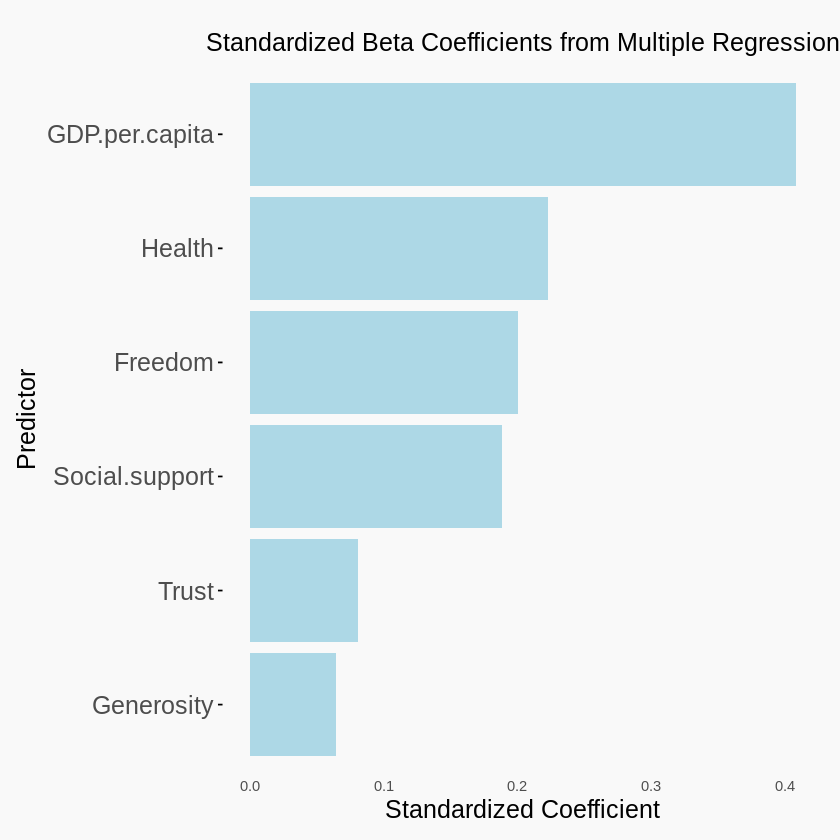

In [ ]:
# Install and load necessary packages if not already done
if (!require("lm.beta")) install.packages("lm.beta")
if (!require("ggplot2")) install.packages("ggplot2")
library(lm.beta)
library(ggplot2)

# Step 1: Run the regression and get standardized coefficients
model <-  lm(Happiness.Score ~ Freedom + Social.support + GDP.per.capita + Generosity + Health + Trust, data = world_happiness_report)
model_beta <- lm.beta(model)

# Step 2: Extract beta coefficients and confidence intervals
beta_coefficients <- coef(model_beta)[-1]  # Exclude intercept
conf_intervals <- confint(model_beta)[-1, ]  # Exclude intercept

# Step 3: Create a data frame for ggplot
plot_data <- data.frame(
  Predictor = names(beta_coefficients),
  Beta = beta_coefficients
)

# Step 4: Plot
ggplot(plot_data, aes(x = reorder(Predictor, Beta), y = Beta)) +
  geom_col(fill = "lightblue") +
  coord_flip() +
  labs(
    title = "Standardized Beta Coefficients from Multiple Regression",
    x = "Predictor",
    y = "Standardized Coefficient"
  ) +
  theme_minimal() +
   theme(
    panel.background = element_rect(fill = "#F9F9F9", color = NA),
    plot.background = element_rect(fill = "#F9F9F9", color = NA),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.ticks.y = element_line(color = "black"),
    axis.text.y = element_text(size = 15),
    axis.title = element_text(size = 15),
    plot.title = element_text(size = 15, hjust = 0.5),
    plot.margin = margin(t = 20, r = 10, b = 10, l = 10)
   )


In [ ]:
ggsave("plot.pdf",
       plot = last_plot(),
       width = 10,
       height = 6,
       units = "in")